In [393]:
import scipy.io
import numpy as np

import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from skimage import io, color
from scipy import ndimage as ndi
from scipy.signal import convolve2d
import cv2
from os import listdir
import os
%matplotlib inline
# plt.style.use('dark_background')


# Problem 2 : Color and Texture Segmentation

### Problem 2(a)

In [2]:
def kmeans_segmentation(img_path):
    image = imageio.imread(img_path)
    image_3d = image.reshape(-1,3)
    
    # leaning dictionary 
    kmeans = KMeans(n_clusters=10,max_iter=1000, random_state=0)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [3]:
mountain_kmeans = kmeans_segmentation("./Problem2/mountain.jpg")
zebra_kmeans = kmeans_segmentation("./Problem2/zebra.jpg")

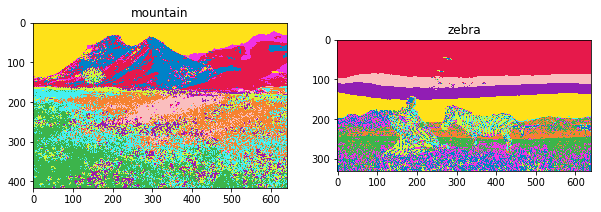

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_kmeans)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_kmeans)
plt.show()

In [5]:
def kmeans_segmentation_lab(img_path):
    image = imageio.imread(img_path)
    image = color.rgb2lab(image)
    image_lab = image
    image_3d = image.reshape(-1,3)
    
    # leaning dictionary 
    kmeans = KMeans(n_clusters=10,max_iter=1000, random_state=0)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans, image_lab

In [6]:
mountain_kmeans_lab, mountain_lab = kmeans_segmentation_lab("./Problem2/mountain.jpg")
zebra_kmeans_lab, mountain_lab = kmeans_segmentation_lab("./Problem2/zebra.jpg")

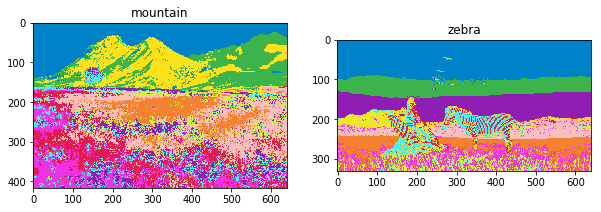

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_kmeans_lab)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_kmeans_lab)
plt.show()

### Problem 2(b)

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def texture_segmentation(image_path):
    image = imageio.imread(image_path)
    image_gray = (rgb2gray(image)).astype(int)
    
    filterBank = scipy.io.loadmat('./Problem2/filterBank.mat')
    filterBank = filterBank["F"]
    filtered_map = []
    
    for i in range(38):
        filtered = convolve2d(image_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0,3)
    image_3d = filtered_map.reshape(-1,38)

    # leaning dictionary 
    kmeans = KMeans(n_clusters=6,max_iter=1000)
    kmeans.fit(image_3d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [9]:
mountain_texture_seg = texture_segmentation("./Problem2/mountain.jpg")
zebra_texture_seg = texture_segmentation("./Problem2/zebra.jpg")

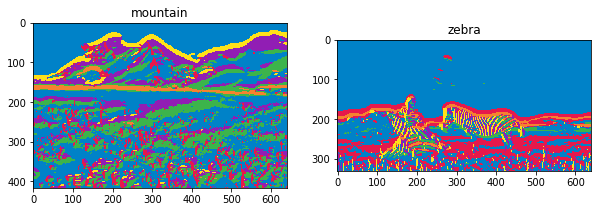

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_texture_seg)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_texture_seg)
plt.show()

In [11]:
def combine_segmentation(image_path):
    image = imageio.imread(image_path)
    image_3d_rgb = image.reshape(-1,3)
    
    image_gray = (rgb2gray(image)).astype(int)
    
    filterBank = scipy.io.loadmat('./Problem2/filterBank.mat')
    filterBank = filterBank["F"]
    filtered_map = []
    
    for i in range(38):
        filtered = convolve2d(image_gray, filterBank[:,:,i], mode="same", boundary="symm")
        filtered_map.append(filtered)
    filtered_map = np.rollaxis(np.array(filtered_map), 0,3)
    image_38d_texture = filtered_map.reshape(-1,38)
    image_41d = np.concatenate((image_3d_rgb,image_38d_texture),1)
    # leaning dictionary 
    kmeans = KMeans(n_clusters=6,max_iter=1000)
    kmeans.fit(image_41d)
    # color encoding
    color_dict = {0:[230, 25, 75],1:[60, 180, 75],2:[255, 225, 25],3:[0, 130, 200],4:[245, 130, 48],
              5:[145, 30, 180],6:[70, 240, 240], 7:[240, 50, 230], 8:[210, 245, 60], 9:[250, 190, 190]
             }
    image_kmeans = np.array([color_dict[i] for i in kmeans.labels_],dtype=np.uint8)
    image_kmeans = image_kmeans.reshape(image.shape)
    return image_kmeans

In [12]:
mountain_combine_seg = combine_segmentation("./Problem2/mountain.jpg")
zebra_combine_seg = combine_segmentation("./Problem2/zebra.jpg")

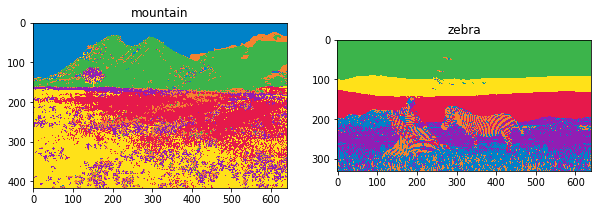

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("mountain")
plt.imshow(mountain_combine_seg)
plt.subplot(1,2,2)
plt.title("zebra")
plt.imshow(zebra_combine_seg)
plt.show()

# Problem 3 : Recognition with Bag of Visual Words

### Problem 3(a)

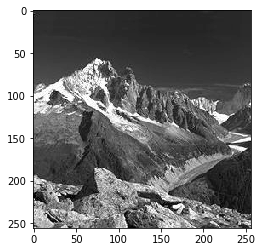

In [14]:
single_image = imageio.imread("./Problem3/train-10/Mountain/image_0044.jpg")
plt.imshow(single_image,cmap="gray")
plt.show()

number of keypoints 30


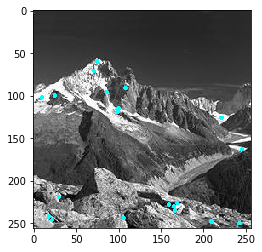

In [42]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures=30)

keypoints, descriptors = sift.detectAndCompute(single_image, None)
print("number of keypoints",len(keypoints))
backtorgb = cv2.cvtColor(single_image,cv2.COLOR_GRAY2RGB)
for k in keypoints:
    cv2.circle(backtorgb,(int(k.pt[0]),int(k.pt[1])),1,(0,255,255),2)
# backtorgb = cv2.drawKeypoints(backtorgb,keypoints,None,(255,0,0),2)

plt.imshow(backtorgb)
plt.show()

### Problem 3(b)

In [377]:
def extract_points(img_path):
    single_image = imageio.imread(img_path)
    ob = cv2.xfeatures2d.SURF_create(500)
#     ob = cv2.xfeatures2d.SIFT_create(nfeatures=30)
    keypoints, descriptors = ob.detectAndCompute(single_image, None)
    keypoints = [k.pt for k in keypoints]
    return keypoints, descriptors

In [378]:
cat_list = listdir("./Problem3/train-10/")
train_10_path = [ os.path.join("./Problem3/train-10/",cat,img)  for cat in cat_list 
                 for img in  listdir("./Problem3/train-10/"+cat)]

In [379]:
keypoints_list = []
descriptors_list = []
keypoints, descriptors = extract_points(train_10_path[0])
for path in train_10_path:
    keypoints, descriptors = extract_points(path)
    keypoints_list += keypoints
    descriptors_list += list(descriptors)
keypoints_list = np.array(keypoints_list)
descriptors_list = np.array(descriptors_list)

In [380]:
print("interesting points shape", keypoints_list.shape)
print("descriptors_list shape", descriptors_list.shape)

interesting points shape (14034, 2)
descriptors_list shape (14034, 64)


In [381]:
# kmeans cluster
kmeans = KMeans(n_clusters=50,max_iter=5000)
kmeans.fit(descriptors_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [382]:
cluster_centroid = kmeans.cluster_centers_
clusters = kmeans.labels_
print("cluster centroid", cluster_centroid.shape)

cluster centroid (50, 64)


In [383]:
# 3-dimensional PCA
pca = PCA(n_components=3)
reduced_descriptors = pca.fit_transform(descriptors_list)

selected cluster: [ 0 12 23 49 20 33]
number of selected interesting points: 1591


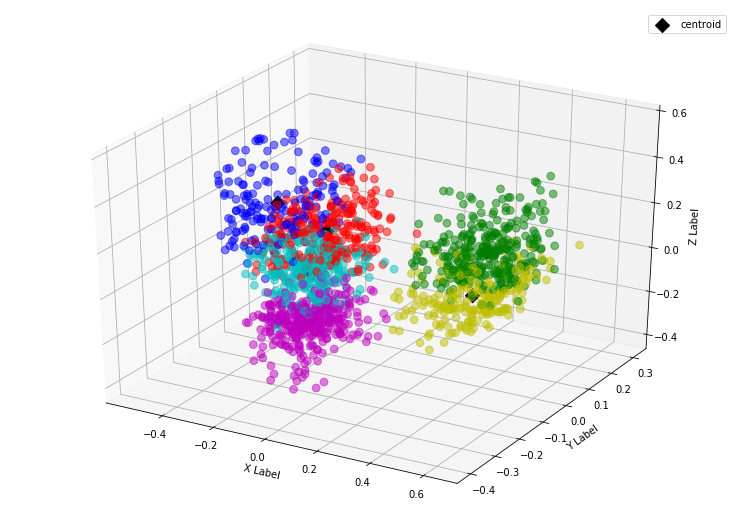

In [384]:
# select 6 cluster
random_cluster = np.random.choice(50,6, replace=False)
print("selected cluster:", random_cluster)
selected_index = np.isin(clusters, random_cluster)
select_cluster = clusters[selected_index]
select_descriptor = reduced_descriptors[selected_index]
select_centroid = pca.transform(cluster_centroid[random_cluster])
print("number of selected interesting points:",len(select_cluster))


color_dict = {}
for clus, col in zip(np.unique(select_cluster),['b', 'g', 'r', 'c', 'm', 'y']):
    color_dict[clus] = col
select_color = [ color_dict[clus] for clus in select_cluster]

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(select_descriptor[:,0], select_descriptor[:,1], select_descriptor[:,2],
           s=60,
           c=select_color,
           alpha=0.5
          )
ax.scatter(select_centroid[:,0], select_centroid[:,1], select_centroid[:,2],
           s=100,
           c = 'black', 
           marker = 'D',
           label = "centroid",
          alpha=1)
ax.legend()
ax.grid(True)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Problem 3(c)

In [385]:
# BoW encoding for each image
def BoW_hard_sum(image_path):    
    descriptors = extract_points(image_path)[1] # (n_points, 64)

    d_c_matrix = np.array([[np.linalg.norm(d-c)  for c in cluster_centroid] #　compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster) 

    unique_counts = np.unique(np.argmin(d_c_matrix,axis=1), return_counts=True)
    feature_vector = np.zeros(len(cluster_centroid))
    for c, count in zip(unique_counts[0],unique_counts[1]): # c: max 
        feature_vector[c] = count
    feature_vector = feature_vector/ d_c_matrix.shape[0] # normalize
    return feature_vector

def BoW_soft_sum(image_path):    
    descriptors = extract_points(image_path)[1] # (n_points, 64)

    d_c_matrix = np.array([[np.linalg.norm(d-c)  for c in cluster_centroid] #　compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster) 
    
    reciprocal_matrix = np.reciprocal(d_c_matrix)
    return(np.mean(np.divide(reciprocal_matrix.T, 
                             reciprocal_matrix.sum(axis=1)
                            ).T
                   , axis=0))

def BoW_soft_max(image_path):    
    descriptors = extract_points(image_path)[1] # (n_points, 64)

    d_c_matrix = np.array([[np.linalg.norm(d-c)  for c in cluster_centroid] #　compute l1 norm distance
                           for d in descriptors]) # (n_points, cluster) 
    
    reciprocal_matrix = np.reciprocal(d_c_matrix)
    return(np.max(reciprocal_matrix, axis=0))

In [386]:
# construct 50*c matrix
train_X_hard_sum = np.array([ BoW_hard_sum(path) for path in train_10_path])
train_X_soft_sum = np.array([ BoW_soft_sum(path) for path in train_10_path])
train_X_soft_max = np.array([ BoW_soft_max(path) for path in train_10_path])

In [387]:
# PCA for visualizaiton
pca = PCA(n_components=3)
reduced_hard_sum = pca.fit_transform(train_X_hard_sum)
reduced_soft_sum = pca.fit_transform(train_X_soft_sum)
reduced_soft_max = pca.fit_transform(train_X_soft_max)

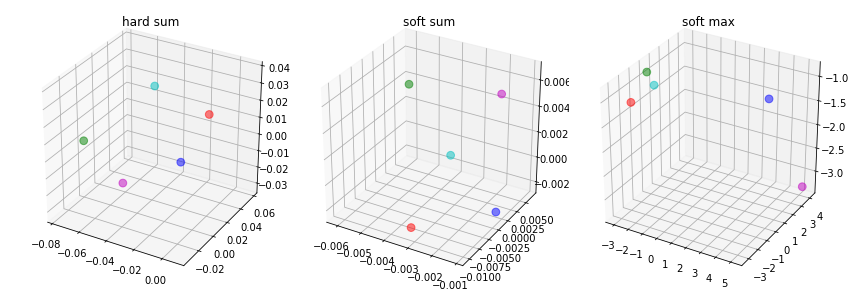

In [388]:
sample_index = list(range(0,50,10))
plot_dim_stacked = [reduced_hard_sum[sample_index], 
                    reduced_soft_sum[sample_index], 
                    reduced_soft_max[sample_index]]
title_ = ["hard sum", "soft sum", "soft max"]
fig = plt.figure(figsize=(15,5))
for i in range(3):
    plot_dim = plot_dim_stacked[i]
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(plot_dim[:,0], plot_dim[:,1], plot_dim[:,2],
               s=60,
               c=['b', 'g', 'r', 'c', 'm'],
               alpha=0.5,
              )
    plt.title(title_[i])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

(d) (25%) Finally, We adopt the k-nearest neighbors classiffier (k-NN) to perform classification using the above BoW features.
(i) Use Train-10 as the training data and Test-100 for testing. Report the classification accuracy using Hard-Sum, Soft-Sum, and Soft-Max. Are the results as
expected (based on your observation on dierent BoW features in (c))? If not, why?
(ii) Repeat (a) to (c) using Train-100 as the training data. Do you observe improved
classifcation results? Note that you might need to adjust parameters (e.g., the number
C of clusters as visual words, and the number of k nearest neighbors in k-NN, etc.) for
this experiment. Please report and explain your results.

In [412]:
# training
train_y = np.array([[i]*10 for i in range(5)]).flatten()
knn_hard_sum = KNeighborsClassifier(n_neighbors=7, n_jobs=10)
knn_hard_sum.fit(train_X_hard_sum, train_y)

knn_soft_sum = KNeighborsClassifier(n_neighbors=7, n_jobs=10)
knn_soft_sum.fit(train_X_soft_sum, train_y) 

knn_soft_max = KNeighborsClassifier(n_neighbors=7, n_jobs=10)
knn_soft_max.fit(train_X_soft_max, train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=7, p=2,
           weights='uniform')

In [409]:
# load testing data
cat_list = listdir("./Problem3/test-100/")
test_100_path = [ os.path.join("./Problem3/test-100/",cat,img)  for cat in cat_list 
                 for img in  listdir("./Problem3/test-100/"+cat)]
test_X_hard_sum = np.array([ BoW_hard_sum(path) for path in test_100_path])
test_X_soft_sum = np.array([ BoW_soft_sum(path) for path in test_100_path])
test_X_soft_max = np.array([ BoW_soft_max(path) for path in test_100_path])
test_y = np.array([[i]*100 for i in range(5)]).flatten()

In [413]:
print("hard sum: ", accuracy_score(y_pred=knn_hard_sum.predict(test_X_hard_sum), y_true=test_y))
print("soft sum: ", accuracy_score(y_pred=knn_soft_sum.predict(test_X_soft_sum), y_true=test_y))
print("soft max: ", accuracy_score(y_pred=knn_soft_max.predict(test_X_soft_max), y_true=test_y))


hard sum:  0.502
soft sum:  0.532
soft max:  0.554


In [414]:
##### Use train-100 for training
# load training path 
# load testing data
cat_list = listdir("./Problem3/train-100/")
train_100_path = [ os.path.join("./Problem3/train-100/",cat,img)  for cat in cat_list 
                 for img in  listdir("./Problem3/train-100/"+cat)]

# construct trianing matrix
train_X_hard_sum = np.array([ BoW_hard_sum(path) for path in train_100_path])
train_X_soft_sum = np.array([ BoW_soft_sum(path) for path in train_100_path])
train_X_soft_max = np.array([ BoW_soft_max(path) for path in train_100_path])

In [430]:
# training
n = 5
train_y = np.array([[i]*100 for i in range(5)]).flatten()
knn_hard_sum = KNeighborsClassifier(n_neighbors=n, n_jobs=10)
knn_hard_sum.fit(train_X_hard_sum, train_y)

knn_soft_sum = KNeighborsClassifier(n_neighbors=n, n_jobs=10)
knn_soft_sum.fit(train_X_soft_sum, train_y) 

knn_soft_max = KNeighborsClassifier(n_neighbors=n, n_jobs=10)
knn_soft_max.fit(train_X_soft_max, train_y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [431]:
print("hard sum: ", accuracy_score(y_pred=knn_hard_sum.predict(test_X_hard_sum), y_true=test_y))
print("soft sum: ", accuracy_score(y_pred=knn_soft_sum.predict(test_X_soft_sum), y_true=test_y))
print("soft max: ", accuracy_score(y_pred=knn_soft_max.predict(test_X_soft_max), y_true=test_y))

hard sum:  0.606
soft sum:  0.682
soft max:  0.654
